In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
corr_xy = 0.0

mean = [-3, 3] # mean of normal distribution
cov = [[1, corr_xy], 
       [corr_xy, 1]] # covariance of normal distribution
sample = np.random.multivariate_normal(mean, cov, size=1000) # 1000 normally distributed samples
sample

array([[-2.30603333,  1.51865689],
       [-2.6264777 ,  1.90677964],
       [-3.20245289,  2.35957017],
       ...,
       [-2.38734388,  2.78304377],
       [-4.3003114 ,  3.60680311],
       [-2.57489594,  3.05655981]])

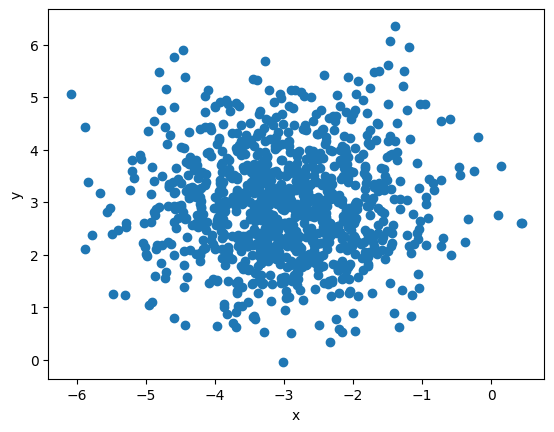

In [3]:
x, y = sample[:, 0], sample[:, 1]  # separate samples on feature x and target y

# Visualize dataset
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Навчимо лінійну регресію (без вільного члена в залежності)

$ y \sim \beta_1 x $

In [4]:
x.shape, x.reshape(-1,1).shape

((1000,), (1000, 1))

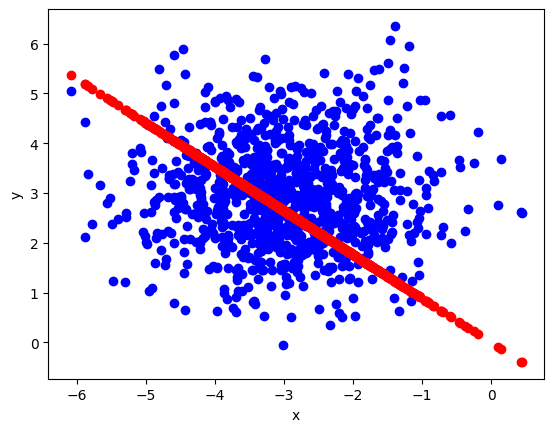

In [5]:
lr = LinearRegression(fit_intercept=False)
lr.fit(x.reshape(-1,1), y)

y_pred = lr.predict(x.reshape(-1,1))

# Visualize dataset
plt.scatter(x, y, color = 'blue')
plt.scatter(x, y_pred, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
lr.coef_

array([-0.88108479])

Оцінена лінія обов'язково буде проходити через точку (0,0), оскільки в ній немає вільного члена

$ y = \beta_1 x $

$ 0 = \beta_1 0 $

Навчимо лінійну регресію по-іншому (включаючи вільний член в залежності)

$ y \sim \beta_0 1 + \beta_1 x $

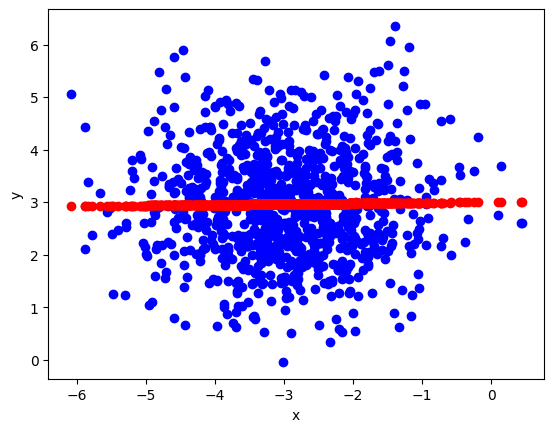

In [7]:
lr_bias = LinearRegression(fit_intercept=True)
lr_bias.fit(x.reshape(-1,1), y)

y_pred_bias = lr_bias.predict(x.reshape(-1,1))

# Visualize dataset
plt.scatter(x, y, color = 'blue')
plt.scatter(x, y_pred_bias, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
0, lr.coef_[0]

(0, -0.8810847921502342)

In [9]:
lr_bias.intercept_, lr_bias.coef_[0]

(3.0000157870837723, 0.01300676938940008)

Text(0.5, 1.0, 'два параметри')

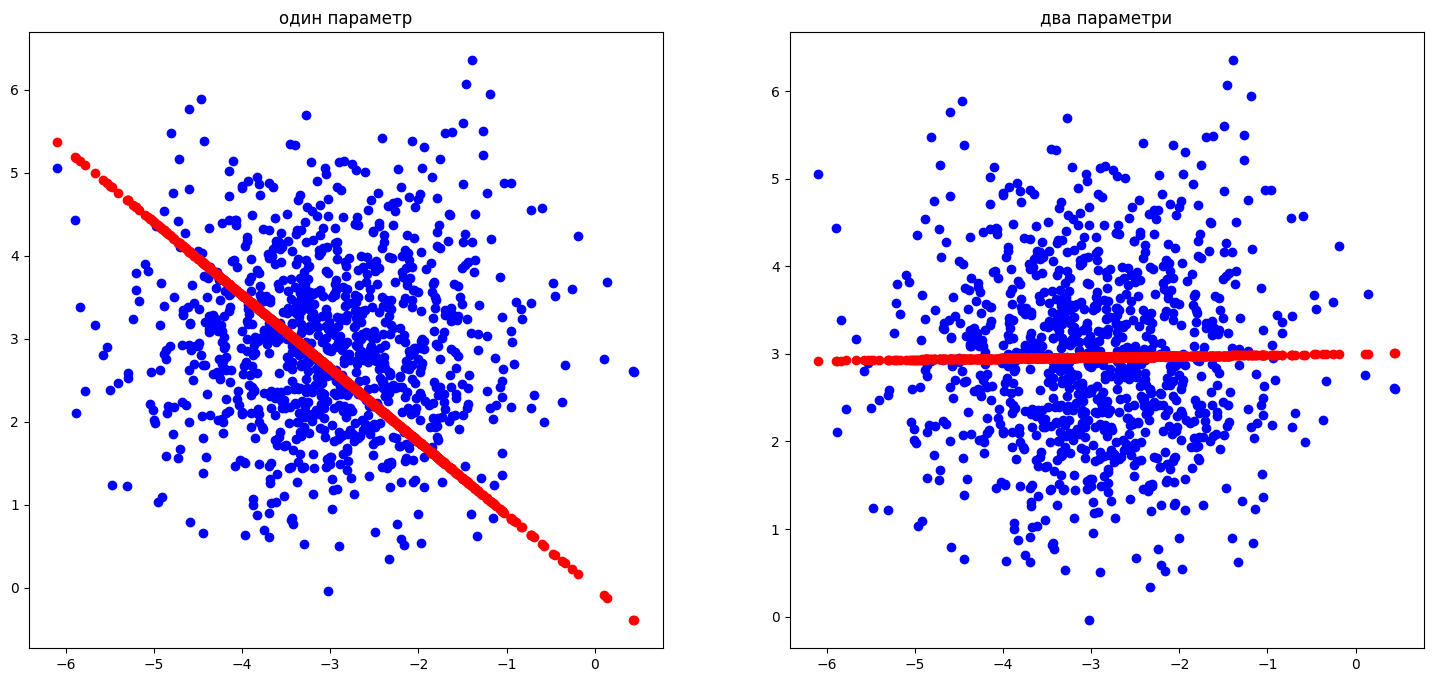

In [10]:
fig, axs = plt.subplots(1,2, figsize=(18,8))

axs[0].scatter(x, y, color='blue'); axs[0].scatter(x, y_pred, color='red'); axs[0].set_title("один параметр")
axs[1].scatter(x, y, color='blue'); axs[1].scatter(x, y_pred_bias, color='red'); axs[1].set_title("два параметри")

Як зробити, щоб вільний член був у моделі, коли реалізуєте алгоритм вручну? Додати до матриці x стовпець із одиницями.

In [11]:
X = np.array([np.array([1, val]) for val in x])
X

array([[ 1.        , -2.30603333],
       [ 1.        , -2.6264777 ],
       [ 1.        , -3.20245289],
       ...,
       [ 1.        , -2.38734388],
       [ 1.        , -4.3003114 ],
       [ 1.        , -2.57489594]])

In [12]:
X[0][1:], X[0]

(array([-2.30603333]), array([ 1.        , -2.30603333]))

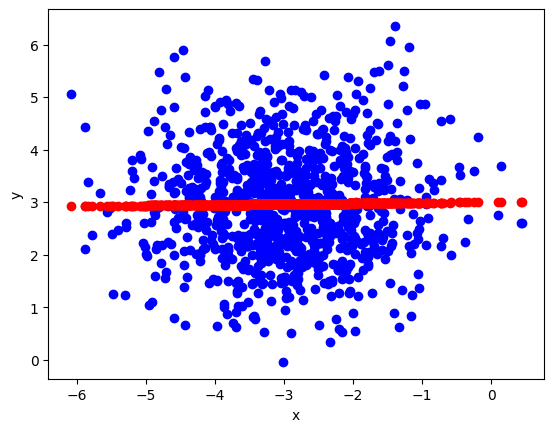

In [13]:
lr3 = LinearRegression(fit_intercept = False)
lr3.fit(X, y)

y_pred3 = lr3.predict(X)

# Visualize dataset
plt.scatter(x, y, color = 'blue')
plt.scatter(x, y_pred3, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
0, lr.coef_[0]
# y = -0.81 x

(0, -0.8810847921502342)

In [15]:
lr_bias.intercept_, lr_bias.coef_[0]
# y = 5.34 + 0.786 x

(3.0000157870837723, 0.01300676938940008)

In [16]:
lr3.coef_[0], lr3.coef_[1]
# y = 5.34 + 0.786 x

(3.0000157870837727, 0.013006769389400152)

In [17]:
lr3.coef_

array([3.00001579, 0.01300677])

Порівняння якості моделей

$ MSE = \cfrac{\sum (a(x_k) - y)^2}{k} $

$ MAE = \cfrac{\sum |a(x_k) - y|}{k} $

$ R^2 = \cfrac{ESS}{TSS}, ESS = \sum (a(x_k) - y_{avg}) , TSS = \sum (y_k - y_{avg}) $

$ R^2 \rightarrow 1 $ - гарна модель

In [18]:
mse_arr = [ ((y - ans)**2).mean() for ans in [y_pred, y_pred_bias, y_pred3] ]
mae_arr = [ np.abs(y - ans).mean() for ans in [y_pred, y_pred_bias, y_pred3] ]
r2_arr = [ r2_score(y, ans) for ans in [y_pred, y_pred_bias, y_pred3] ]

In [19]:
df_errors = pd.DataFrame(columns = ['mse', 'mae', 'r2'], index = ['y_pred','y_pred_bias',"y_pred3"])

df_errors['mse'] = mse_arr
df_errors['mae'] = mae_arr
df_errors['r2'] = r2_arr

df_errors

,mse,mae,r2
y_pred,2.004516,1.107766,-0.899032
y_pred_bias,1.055366,0.818931,0.000170
y_pred3,1.055366,0.818931,0.000170


$ L_1(x) \rightarrow max, L_2(x) \rightarrow min $

$ 0.5L_1(x) + 0.7L_2(x) \rightarrow min $